# Question 1: Clean Data
- Converted txt to csv file
- Manually deleted unecessary columns
- Manually deleted unecessary spaces from csv file in visual studio code
- Used CleanData.py to seperate the 'DATE' column in three seperate columns (YEAR, MONTH, DAY)

In [1]:
import pandas as pd

# Read the text file into a pandas DataFrame
df = pd.read_csv('OriginalData/WthObs.csv',header=0)

# Split the date column into year, month, and day columns
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
df['MONTH'] = pd.to_datetime(df['DATE']).dt.month
df['DAY'] = pd.to_datetime(df['DATE']).dt.day

# Write the sorted DataFrame to a new text file
df.to_csv('sorted_WthObs.csv', encoding='utf-8')

# Question 2: Precipitation Analysis
- Bar graph of total precipitation in each year
- Bar graph of total precipitation during the month of January overtime
- How many days did we get both snow and rain?
- What was the longest stretch of snow depth?

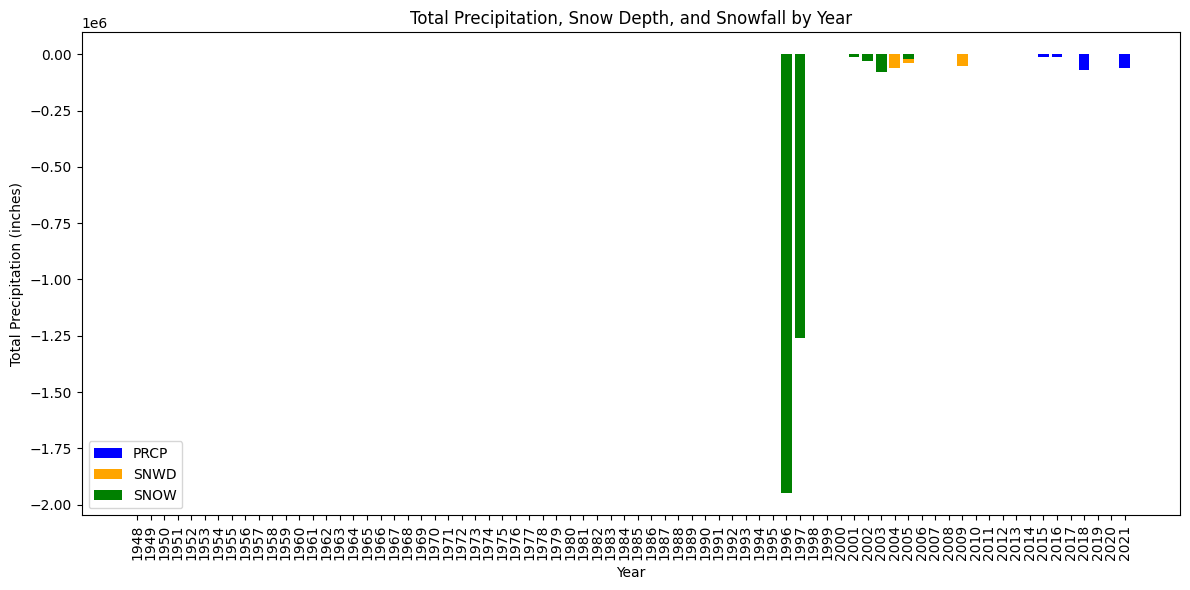

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
file = pd.read_csv('PrecipData.csv', header=0)

# Group the data by year and sum the precipitation, snow depth, and snowfall for each year
yearly_totals = file.groupby('YEAR').sum()

# Plot the bar graph of total precipitation for each year
plt.figure(figsize=(12, 6))
plt.bar(yearly_totals.index, yearly_totals['PRCP'], color='blue', label='PRCP')
plt.bar(yearly_totals.index, yearly_totals['SNWD'], color='orange', label='SNWD')
plt.bar(yearly_totals.index, yearly_totals['SNOW'], color='green', label='SNOW')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.title('Total Precipitation, Snow Depth, and Snowfall by Year')
plt.xticks(range(1948, 2022), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

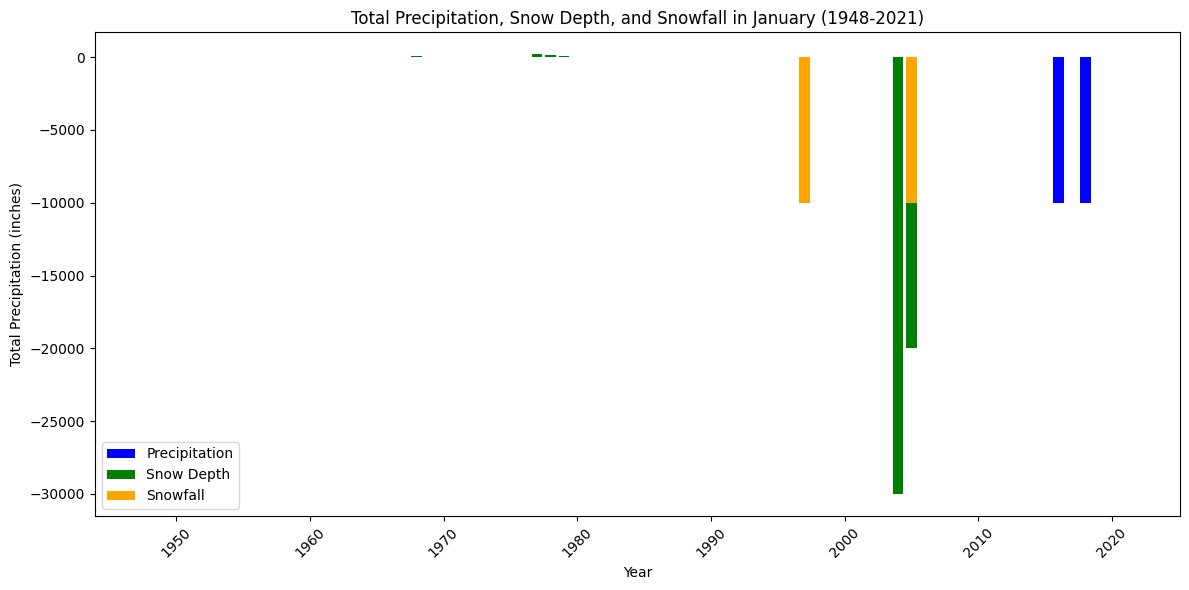

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a pandas DataFrame
file = pd.read_csv('PCData/PrecipData.csv', header=0)

# Filter data for the month of January
january_data = file[file['MONTH'] == 1]

# Group by year and calculate the total precipitation, snow depth, and snowfall for January
january_totals = january_data.groupby('YEAR').sum()

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(january_totals.index, january_totals['PRCP'], color='blue', label='Precipitation')
plt.bar(january_totals.index, january_totals['SNWD'], color='green', label='Snow Depth')
plt.bar(january_totals.index, january_totals['SNOW'], color='orange', label='Snowfall')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.title('Total Precipitation, Snow Depth, and Snowfall in January (1948-2021)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file = pd.read_csv('PCData/RainSnow.csv', header=0)

# Filter the DataFrame to include only rows where both PRCP and SNOW are greater than 0
snow_and_rain_days = file[(file['PRCP'] > 0) & (file['SNOW'] > 0)]

# Count the number of rows (days) where both PRCP and SNOW are greater than 0
num_days = len(snow_and_rain_days)

print("Number of days with both snow and rain:", num_days)

Number of days with both snow and rain: 764


In [7]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file = pd.read_csv('PCData/SnowDepth.csv', header=0)

# Group consecutive rows with the same snow depth
file['group'] = (file['SNWD'] != file['SNWD'].shift()).cumsum()

# Count the number of consecutive days for each group
snow_depth_stretch = file.groupby(['SNWD', 'group']).size().reset_index(name='days_count')

# Find the group with the longest stretch of snow depth
longest_stretch = snow_depth_stretch.loc[snow_depth_stretch['SNWD'] > 0].nlargest(1, 'days_count')

print("Longest stretch of snow depth:")
print(longest_stretch)

Longest stretch of snow depth:
     SNWD  group  days_count
291   1.0    176           7


# Question 3: Temperature Analysis
- Over the entire file, what is the average rate of change of the average temperature in a day's time.
    - On average in between each day, how much did the temperature change throughout the year.  We don't need to know what direction, but the magnitude.
- Build a line graph comparison of the min, max, and average temperatures over the span of the entire timeframe of the data.
- Which day(s) was there the largest gap between the min and max temperature? 

In [9]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file = pd.read_csv('TPData/TempData.csv', header=0)

#-----------------------NOT WORKING HOW I WANT???---------------------------------

# Calculate the average temperature for each day
file['AVG_TEMP'] = (file['TMAX'] + file['TMIN']) / 2

# Calculate the difference in average temperature between consecutive days
file['AVG_TEMP_DIFF'] = file['AVG_TEMP'].diff()

# Remove rows where average temperature difference is NaN (first row)
file = file.dropna(subset=['AVG_TEMP_DIFF'])

# Calculate the average rate of change of average temperature in a day's time
average_rate_of_change = file['AVG_TEMP_DIFF'].mean()

print("Average rate of change of average temperature in a day's time:", average_rate_of_change)

Average rate of change of average temperature in a day's time: 0.0004994820186473287


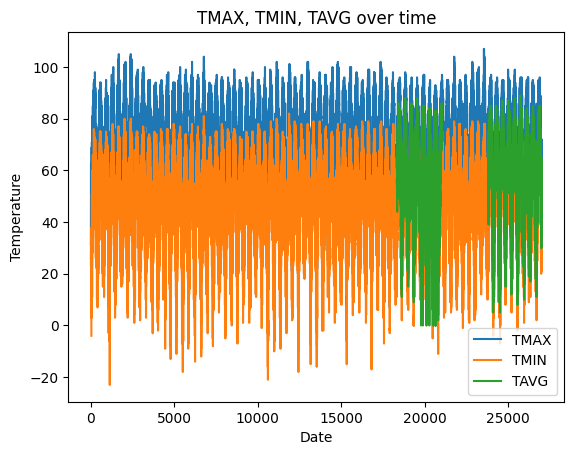

In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt

file = pd.read_csv('TPData/TempData.csv', header=0)

# Replace -9999 with NaN
file["TMIN"] = file["TMIN"].replace(-9999, math.nan)
file["TMAX"] = file["TMAX"].replace(-9999, math.nan)
file["TAVG"] = file["TAVG"].replace(-9999, math.nan)

# Plotting
xdata = range(len(file))
plt.plot(xdata, file['TMAX'])
plt.plot(xdata, file['TMIN'])
plt.plot(xdata, file['TAVG'])
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.legend(["TMAX", "TMIN", "TAVG"], loc="lower right")
plt.title("TMAX, TMIN, TAVG over time")
plt.show()


In [11]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file = pd.read_csv('TPData/TempData.csv', header=0)

# Calculate the difference between max and min temperature
file['TEMP_GAP'] = file['TMAX'] - file['TMIN']

# Find the maximum temperature gap
max_temp_gap = file['TEMP_GAP'].max()

# Filter rows where the temperature gap equals the maximum
max_gap_days = file[file['TEMP_GAP'] == max_temp_gap]

print("Day with the largest gap between min and max temperature:")
print(max_gap_days)

Day with the largest gap between min and max temperature:
    TAVG  TMAX  TMIN  YEAR  MONTH  DAY  TEMP_GAP
28 -9999    26 -9999  1948      1   29     10025
